[Reference](https://medium.com/@francescofranco_39234/affinity-propagation-with-scikit-learn-a0d42a3cceb4)

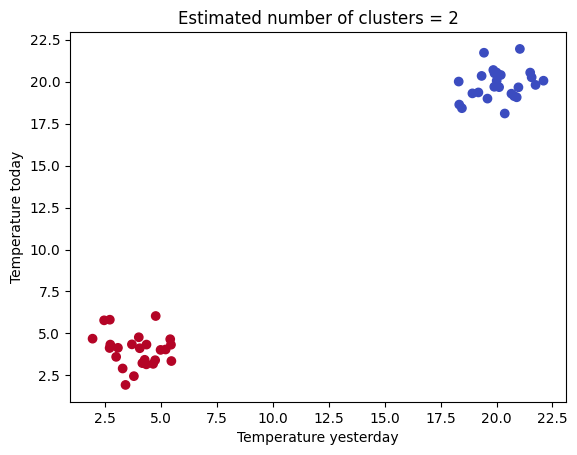

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation

# Configuration options
num_samples_total = 50
cluster_centers = [(20,20), (4,4)]
num_classes = len(cluster_centers)

# Generate data
X, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 1)

np.save('./clusters.npy', X)
X = np.load('./clusters.npy')

# Fit AFfinity Propagation with Scikit
afprop = AffinityPropagation(max_iter=250)
afprop.fit(X)
cluster_centers_indices = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)

# Predict the cluster for all the samples
P = afprop.predict(X)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', P))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('Temperature yesterday')
plt.ylabel('Temperature today')
plt.show()